<a href="https://colab.research.google.com/github/vbloise3/Data_Science/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

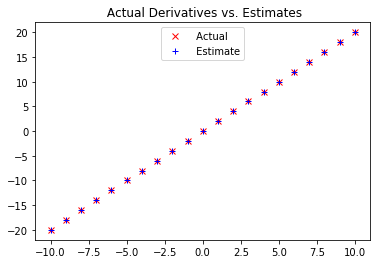

0 [7.608767876411721, 3.895025509871359, 6.409182407418442]
100 [1.0090714166759869, 0.5165565533178743, 0.849982924520299]
200 [0.13382260314565883, 0.0685055006955409, 0.11272435796800558]
300 [0.01774749419785708, 0.009085169078590333, 0.014949454292238084]
400 [0.002353664798764516, 0.0012048710884313947, 0.001982589989105527]
500 [0.0003121419803372635, 0.0001597894686581996, 0.00026293020387655857]
600 [4.1396130808436675e-05, 2.1191208370109034e-05, 3.48696868694261e-05]
700 [5.489936483575985e-06, 2.8103686429170358e-06, 4.624402386812397e-06]
800 [7.280729383422495e-07, 3.7270984132419764e-07, 6.132861908176966e-07]
900 [9.655670974193716e-08, 4.9428613634019055e-08, 8.13337422626278e-08]


In [10]:
import random
import math
import matplotlib.pyplot as plt
from typing import List
from typing import Callable


Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

def sum_of_squares( v: Vector)-> float: 
  """ Computes the sum of squared elements in v""" 
  return dot( v, v)

def difference_quotient( f: Callable[[ float], float], x: float, h: float)-> float: 
  return (f( x + h)-f( x)) / h
  
def square( x: float)-> float: 
  return x * x

def derivative( x: float)-> float: 
  return 2 * x

xs = range(-10, 11) 
actuals = [derivative( x) for x in xs] 
estimates = [difference_quotient( square, x, h = 0.001) for x in xs]

# plot to show they're basically the same
plt.title(" Actual Derivatives vs. Estimates") 
plt.plot( xs, actuals, 'rx', label =' Actual') # red x 
plt.plot( xs, estimates, 'b +', label =' Estimate') # blue + 
plt.legend( loc = 9) 
plt.show()

def partial_difference_quotient( f: Callable[[ Vector], float], v: Vector, i: int, h: float)-> float: 
  """ Returns the i-th partial difference quotient of f at v""" 
  w = [v_j + (h if j == i else 0) # add h to just the ith element of v 
       for j, v_j in enumerate( v)] 
  return (f( w)-f( v)) / h

def estimate_gradient( f: Callable[[ Vector], float], v: Vector, h: float = 0.0001): 
  return [partial_difference_quotient( f, v, i, h) for i in range( len( v))]

def gradient_step( v: Vector, gradient: Vector, step_size: float)-> Vector: 
  """ Moves ` step_size ` in the ` gradient ` direction from ` v `""" 
  assert len( v) == len( gradient) 
  step = scalar_multiply( step_size, gradient) 
  return add( v, step)

def sum_of_squares_gradient( v: Vector)-> Vector: 
  return [2 * v_i for v_i in v] 

# "Using the Gradient" example
    
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]
    
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    if epoch % 100 == 0: 
      print(epoch, v)
    
assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0